In [2]:
import gensim
import os
from  tqdm import tqdm
import re
import jieba 
import pickle
from multiprocessing import Process,Manager 
import random

In [2]:
PATHS = []
CORPUS = [] 
for prim in os.listdir("../text/"):
    for path in os.listdir("../text/{}".format(prim)):
        PATHS.append("../text/{}/{}".format(prim,path))

#%% 
def process_text_atomic(file):
    with open(file) as f :
        lines = f.readlines()
    corpus = []
    for line in lines:
        filtered_line = "".join(re.findall(r"\w",line))
        if len(filtered_line) <= 2:
            continue
        cut_word_line = list(jieba.cut(filtered_line))
        corpus.append(cut_word_line)
    file_name = "_".join(file.split("/"))
    with open("pickle"+"/"+file_name,"wb+") as f:
        pickle.dump(corpus,f)

def process_text(paths,name):
    for i in tqdm(paths):
        process_text_atomic(i)
#%% 
flag = False
if flag:
    front = len(PATHS)//2
    end = front+1
    with Manager() as mg:
        CORPUS = Manager().list()
        p1 = Process(target=process_text,args=(PATHS[:front],'front'))
        p2 = Process(target=process_text,args=(PATHS[end:],'end'))
        p1.start()
        p2.start()
        p1.join()
        p2.join()


In [3]:
#%%
prim = os.listdir("../pickle/")
CORPUS = []
for i in tqdm(range(70)):
    with open(os.path.join("../pickle",prim[i]),'rb+') as f:
        CORPUS  += pickle.load(f)

#%%
model = gensim.models.word2vec.Word2Vec(CORPUS,workers=8)
model.save("word2vec")

100%|██████████| 70/70 [00:04<00:00, 17.47it/s]


In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
model.wv.most_similar("说")

[('讲', 0.8458706736564636),
 ('为什么', 0.8291561007499695),
 ('问', 0.8249914646148682),
 ('谁', 0.8167567253112793),
 ('吗', 0.8131126165390015),
 ('告诉', 0.8072018623352051),
 ('听', 0.7857835292816162),
 ('你们', 0.7857633829116821),
 ('以为', 0.7846373319625854),
 ('见', 0.7827645540237427)]

In [6]:
input_words = random.choices(list(model.wv.vocab.keys()),k=500)

In [4]:
model = gensim.models.Word2Vec.load("word2vec")

In [1]:
!ls

README.md				 assignment-04.ipynb
article9k.txt				 learning_typing.py
assignment-01-optional-pattern-match.py  lesson-02.ipynb
assignment-01.ipynb			 lesson_2_rep.ipynb
assignment-01.py			 sci_compute
assignment-02.ipynb			 word2vec
assignment-02.py			 word2vec.trainables.syn1neg.npy
assignment-03.ipynb			 word2vec.wv.vectors.npy
assignment-03.py			 论文阅读笔记模板.docx


In [7]:
from opencc import OpenCC
oc = OpenCC("t2s")

/home/chihao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/home/chihao/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/chihao/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/chihao/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 7716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/chihao/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 7716 missing from current font.
  font.load_char(ord(s), flags=flags)


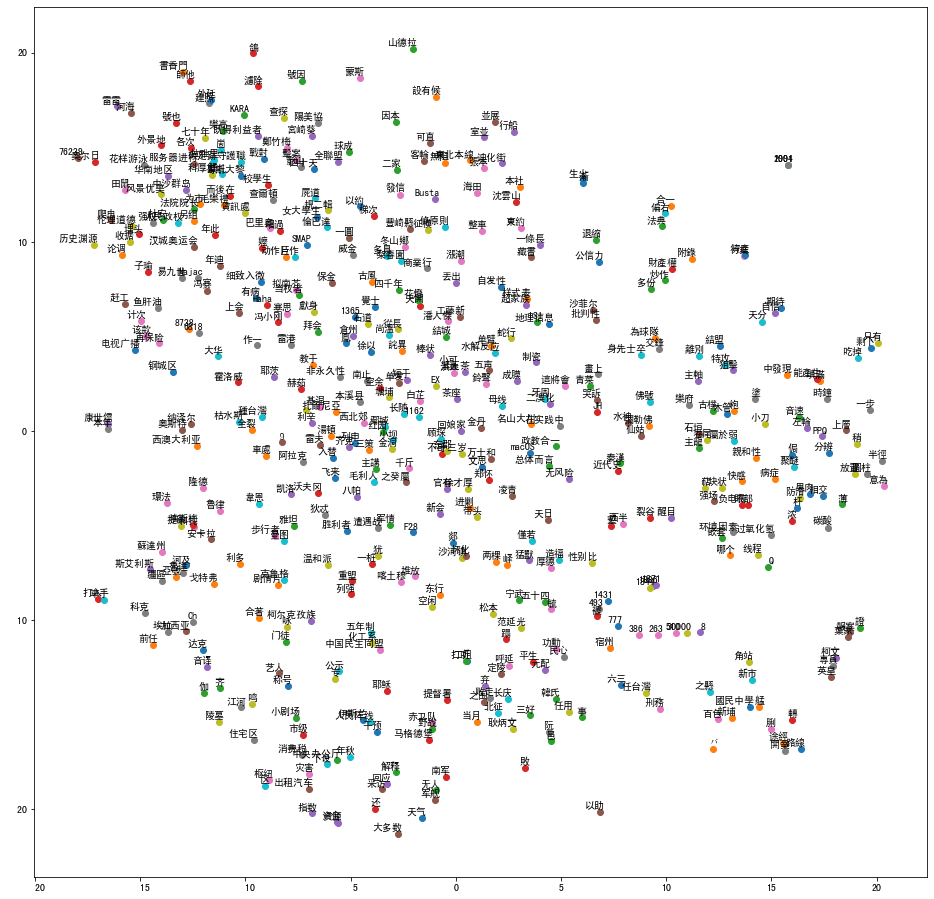

In [9]:
def plot_graph(model,input_words):
    words = []
    vectors = []
    
    for word in input_words:
        words.append(word)
        vectors.append(model[word])
    tsne = TSNE(init="pca",n_components=2,n_iter=1000,perplexity=20,random_state=1)
    results = tsne.fit_transform(vectors)
    X = [i[0] for i in results]
    Y = [i[1] for i in results]
    plt.figure(figsize=(16,16))
    
    for i in range(len(X)):
        plt.scatter(X[i],Y[i])
        plt.annotate(words[i],xy=(X[i],Y[i]),xytext=(5,2),textcoords="offset points",ha="right",va="bottom")
    plt.show()
    
plot_graph(model,input_words)